# CSE213 - Numerical Analysis

# Lab 10 - Systems of Ordinary Differential Equations

We want to develop general software that can be applied to any vector ODE or scalar ODE, and for this purpose it is useful to introduce some general mathematical notation. We have $n$ unknowns $u^{(0)}(t), u^{(1)}(t), \ldots, u^{(n-1)}(t)$ in a system of $n$ ODEs:
$$
\begin{aligned}
\frac{\mathrm{d}}{\mathrm{d} t} u^{(0)} & =f^{(0)}\left(t, u^{(0)}, u^{(1)}, \ldots, u^{(n-1)}\right), \\
\frac{\mathrm{d}}{\mathrm{d} t} u^{(1)} & =f^{(1)}\left(t, u^{(0)}, u^{(1)}, \ldots, u^{(n-1)}\right), \\
& \vdots \\
\frac{\mathrm{d}}{\mathrm{d} t} u^{(n-1)} & =f^{(n-1)}\left(t, u^{(0)}, u^{(1)}, \ldots, u^{(n-1)}\right) .
\end{aligned}
$$
To simplify the notation (and later the implementation), we collect both the solutions $u^{(i)}(t)$ and right-hand side functions $f^{(i)}$ into vectors; $u=$ $(u^{(0)}, u^{(1)}, \ldots, u^{(n-1)})$, and $f=(f^{(0)}, f^{(1)}, \ldots, f^{(n-1}))$. Note that $f$ is now a vector-valued function. It takes $n+1$ input arguments
using the general notation introduced above, applying the forward Euler method to a system of ODEs yields an update formula that looks exactly as for the scalar case, but where all the terms are vectors:
$$
\underbrace{u_{k+1}}_{\text {vector }}=\underbrace{u_k}_{\text {vector }}+\Delta t \underbrace{f\left(u_k, t_k\right)}_{\text {vector }} \text {. }
$$
We could also write this formula in terms of the individual components, as in
$$
u_{k+1}^{(i)}=u_k^{(i)}+\Delta t f^{(i)}\left(t_k, u_k\right), \text { for } i=0, \ldots, n-1\text{.}
$$

In [1]:
import numpy as np

class ForwardEuler:
    """
    A class for solving ordinary differential equations using the Forward Euler method.
    """

    def __init__(self, f):
        """
        Constructor for the ForwardEuler class.

        Parameters
        ----------
        f : function
            A function that takes two parameters (t, u) and returns the derivative of u with respect to t.
        """
        self.f = lambda t, u: np.asarray(f(t, u), float)

    def set_initial_condition(self, u0):
        """
        Set the initial condition for the differential equation.

        Parameters
        ----------
        u0 : float or array_like
            The initial value(s) of u.
        """
        # checking if u0 is a float or an integer
        if isinstance(u0, (float, int)):
            self.neq = 1
            u0 = float(u0)

        # if u0 is not a scalar, it's an array
        else:
            u0 = np.asarray(u0)
            self.neq = u0.size
        self.u0 = u0

    def solve(self, t_span, N):
        """
        Solve the differential equation using the Forward Euler method.

        Parameters
        ----------
        t_span : tuple
            A tuple of two values (t0, T) representing the initial and final times.
        N : int
            The number of time steps to use in the solution.

        Returns
        -------
        t : array_like
            An array of the times used in the solution.
        u : array_like
            An array of the values of u at each time step.
        """
        t0, T = t_span

        # calculating the step size
        self.dt = (T - t0) / N
        self.t = np.zeros(N + 1)
        # neq: number of equations
        if self.neq == 1:
            self.u = np.zeros(N + 1)
        else:
            self.u = np.zeros((N + 1, self.neq))
        self.t[0] = t0
        self.u[0] = self.u0
        for n in range(N):
            self.n = n
            self.t[n + 1] = self.t[n] + self.dt
            self.u[n + 1] = self.advance()
        return self.t, self.u

    def advance(self):
        """
        Advance the solution one time step.

        Returns
        -------
        unew : float or array_like
            The next value of u.
        """
        # assigning the values of u, dt, f, n, and t to local variables for ease of use
        u, dt, f, n, t = self.u, self.dt, self.f, self.n, self.t
        unew = u[n] + dt * f(t[n], u[n])
        return unew


###Example: ODE model for a pendulum.

We will illustrate the updated `ForwardEuler` class by applying it to a system of ODEs that describes the motion of a simple pendulum. Despite its simplicity, this nonlinear system is a classic physics problem for which an exact analytical solution may be impossible. We will describe the system in terms of two main variables, the angle $\theta$ and the angular velocity $\omega$. For a simple pendulum without friction, the dynamics of these variables are governed by the following set of equations:

\begin{equation}
\begin{aligned}
\frac{\mathrm{d} \theta}{\mathrm{d} t} & =\omega \\
\frac{\mathrm{d} \omega}{\mathrm{d} t} & =-\frac{g}{L} \sin (\theta)
\end{aligned}
\end{equation}

Here, $L$ represents the length of the pendulum and $g$ represents the gravitational constant. First equation follows directly from the definition of angular velocity, while the second equation follows from Newton's second law, where $\mathrm{d}\omega/\mathrm{d}t$ represents the acceleration, and the right-hand side represents the tangential component of the gravitational force acting on the pendulum, divided by its mass. To solve this system, we must define initial conditions for both unknowns, i.e., we must know the initial position and velocity of the pendulum.

<!--![picture](https://drive.google.com/uc?export=view&id=1jL_j9mYNi5NCn170UaLTOK_BA9BcUiIt)-->


In [2]:
from math import sin

class Pendulum:
  def __init__(self, L, g=9.81):
    self.L = L
    self.g = g

  def __call__(self, t, u):
    theta, omega = u
    d_theta = omega
    d_omega = -self.g/self.L * sin(theta)
    return [d_theta, d_omega]

This is a Python class called `Pendulum`. The `__init__` method initializes the class with two parameters `L` and `g`, which represent the length of the pendulum and gravitational acceleration, respectively. The `__call__` method takes two arguments, `t` and `u`, representing time and the current state of the pendulum, respectively. The state of the pendulum is represented by a list `[theta, omega]`, where `theta` is the angle of the pendulum and `omega` is its angular velocity. The `__call__` method computes the derivatives of the state variables using the equations of motion for a simple pendulum and returns the result as a list `[d_theta, d_omega]`.

Note that in Python, the `__call__` method is a special method that enables an instance of a class to be called as if it were a function. This means that when an instance of a class has `__call__` implemented, it can be used as a function and called with arguments like a regular function.

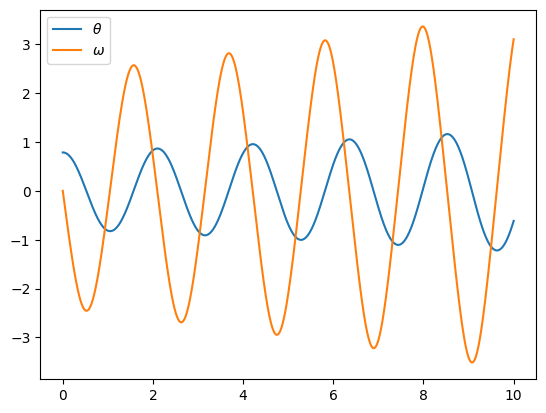

In [3]:
import matplotlib.pyplot as plt

problem = Pendulum(L=1)
solver = ForwardEuler(problem)

# initial conditions
theta0, omega0 = np.pi/4, 0
solver.set_initial_condition((theta0, omega0))
T = 10
N = 1000

t, u = solver.solve(t_span=(0,T),N=N)
plt.plot(t,u[:,0],label=r'$\theta$')
plt.plot(t,u[:,1],label=r'$\omega$')
plt.legend()
plt.show()

##Checking the error in the numerical solution

Apply a simple error measure for the current example, where we
simply compute the error at the final time $T$ , given by
$e=\left|u_N-\hat{u}\left(t_N\right)\right|$ using the `ForwardEuler` class introduced above.The exact equantion is $\exp(t)$.
The Forward Euler method, as applied to this example, is based on the differential equation:
 𝑓(t,𝑢)=𝑢

In [9]:
import numpy as np

def rhs(t,u):
  return (u)
def exact(t):       #calculte the orignal function
  return (np.exp(t))

In [24]:

#here we will determine the right hand by usinf ForwardEuler
solver = ForwardEuler(rhs)
solver.set_initial_condition(1.0)     #passing the intaial values
T = 3.0
t_span = (0, T)
N = 30      #number

print("Time step (dt)\tError (e)\te/dt")
for _ in range(10):
    t, u = solver.solve(t_span, N)
    dt = (T - t[0]) / N

    error = np.abs(u[-1] - exact(T))
    print(f"{dt:<14.7f}\t{error:<12.7f}\t{error/dt:5.4f}")
    N = N * 2

Time step (dt)	Error (e)	e/dt
0.1000000     	2.6361347   	26.3613
0.0500000     	1.4063510   	28.1270
0.0250000     	0.7273871   	29.0955
0.0125000     	0.3700434   	29.6035
0.0062500     	0.1866483   	29.8637
0.0031250     	0.0937359   	29.9955
0.0015625     	0.0469715   	30.0618
0.0007813     	0.0235117   	30.0950
0.0003906     	0.0117624   	30.1116
0.0001953     	0.0058828   	30.1200


Your output should be

| Time step $(\mathrm{d}t)$ | Error $(e)$ | $\mathrm{e} / \mathrm{d}t$ |
|------------------------|---------------------|--------------------------|
| $\mathtt{0.1000000}$              | $\mathtt{2.6361347}$           | $\mathtt{26.3613}$                  |
| $\mathtt{0.0500000}$              | $\mathtt{1.4063510}$           | $\mathtt{28.1270}$                  |
| $\mathtt{0.0250000}$              | $\mathtt{0.7273871}$           | $\mathtt{29.0955}$                  |
| $\mathtt{0.0125000}$              | $\mathtt{0.3700434}$           | $\mathtt{29.6035}$                  |
| $\mathtt{0.0062500}$              | $\mathtt{0.1866483}$           | $\mathtt{29.8637}$                  |
| $\mathtt{0.0031250}$              | $\mathtt{0.0937359}$           | $\mathtt{29.9955}$                  |
| $\mathtt{0.0015625}$              | $\mathtt{0.0469715}$           | $\mathtt{30.0618}$                  |
| $\mathtt{0.0007813}$              | $\mathtt{0.0235117}$           | $\mathtt{30.0950}$                  |
| $\mathtt{0.0003906}$              | $\mathtt{0.0117624}$           | $\mathtt{30.1116}$                  |
| $\mathtt{0.0001953}$              | $\mathtt{0.0058828}$           | $\mathtt{30.1200}$                  |


##Using ODE solvers from SciPy
For solving initial value problems, the tool of choice is the
`solve_ivp` function from the `integrate` module. Complete the following code applying `solve_ivp` with the `Pendulum` class presented above to solve the simple pendulum problem.

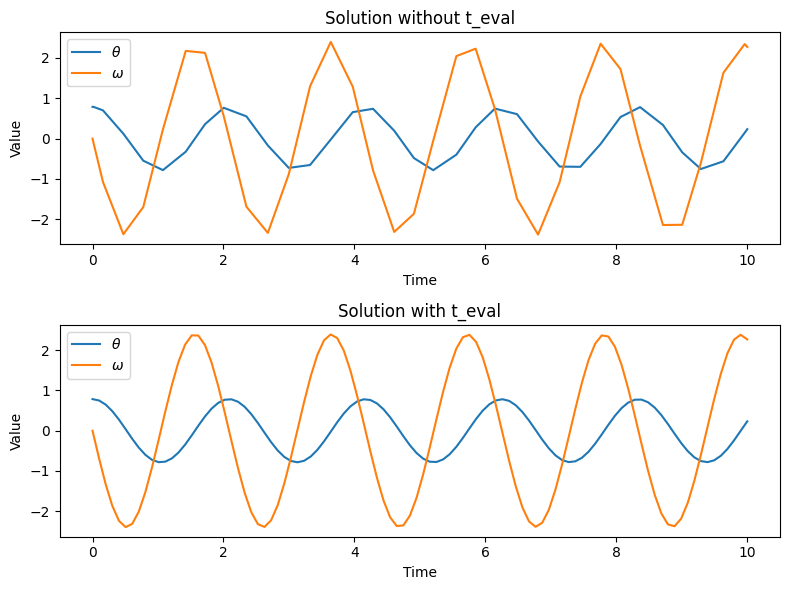

In [21]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

problem = Pendulum(L=1)
t_span = (0, 10.0)
u0 = (np.pi/4, 0)
"""
scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
accoeding to the pervious information about using solve_ivp function
t_eval : provides control over the time points where you obtain the solution
"""

solution = solve_ivp(problem, t_span, u0)   #in this case the t_eval = None so the curves will not be smooth

# First visualization without specifying t_eval
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.plot(solution.t, solution.y[0, :], label=r'$\theta$')
plt.plot(solution.t, solution.y[1, :], label=r'$\omega$')
plt.legend()
plt.title('Solution without t_eval')
plt.xlabel('Time')
plt.ylabel('Value')

# Second visualization with t_eval specified
t_eval = np.linspace(t_span[0], t_span[1], 100)
solution = solve_ivp(problem, t_span, u0, t_eval=t_eval)

plt.subplot(2, 1, 2)
plt.plot(solution.t, solution.y[0, :], label=r'$\theta$')
plt.plot(solution.t, solution.y[1, :], label=r'$\omega$')
plt.legend()
plt.title('Solution with t_eval')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

You may observe that the generated plot appears to be jagged/more crisp compared to the previous one. To obtain a smoother plot, you will need to make some adjustments to the code. Consider reducing the step size and try plotting again.

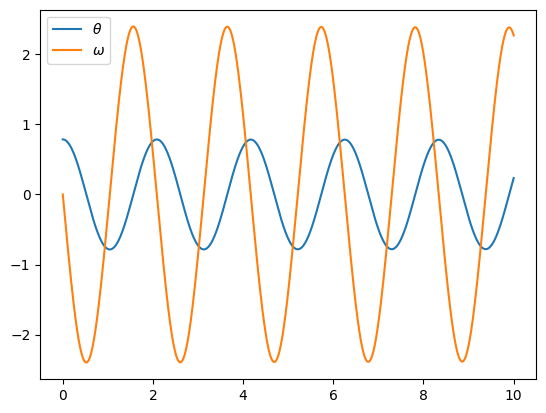

In [22]:
"""
Redo the previous code yet with a
smaller step size for a smoother plot.
"""

#to make it smoother plot we will decrease the step size
t_eval = np.linspace(t_span[0], t_span[1], 1000)
solution = solve_ivp(problem, t_span, u0, t_eval=t_eval)
plt.plot(solution.t, solution.y[0, :])
plt.plot(solution.t, solution.y[1, :])
plt.legend([r"$\theta$", r"$\omega$"])
plt.show()